In [26]:
from fipy import Grid2D, CellVariable, FaceVariable, Viewer
from fipy import ConvectionTerm, DiffusionTerm, TransientTerm
import numpy as np
from scipy import interpolate
from fipy import LinearGMRESSolver

(7, 7, 2)
(7, 7)
(7, 7)
[0.5 1.5 2.5 1.5 2.5 3.5 2.5 3.5 4.5 3.5 4.5 5.5 0.5 1.5 2.5 3.5 1.5 2.5
 3.5 4.5 2.5 3.5 4.5 5.5]
[0.  0.  0.  0.5 1.5 2.5 1.  3.  5.  1.5 4.5 7.5 0.  0.5 1.  1.5 0.  1.5
 3.  4.5 0.  2.5 5.  7.5]


C:\Users\Alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fipy\terms\term.py:120: UserWarning: sweep() or solve() are likely to produce erroneous results when `var` does not contain floats.
  self._checkVar(var)
C:\Users\Alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fipy\terms\abstractBinaryTerm.py:82: UserWarning: sweep() or solve() are likely to produce erroneous results when `var` does not contain floats.
  self.term._checkVar(var)
C:\Users\Alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fipy\terms\term.py:192: UserWarning: sweep() or solve() are likely to produce erroneous results when `var` does not contain floats.
  solver = self._prepareLinearSystem(var, solver, boundaryConditions, dt)


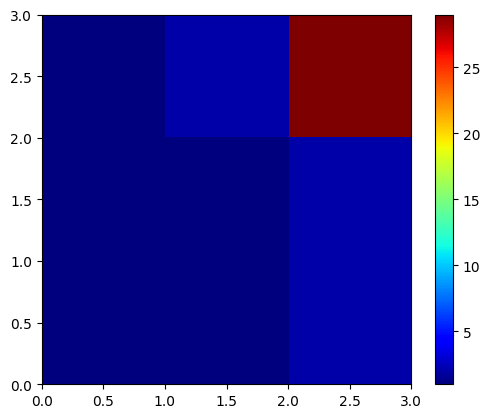

In [27]:
dx = 0.5
nx = 7
dy = 0.5
ny = 7

xy = np.zeros((nx, ny, 2))
xy[:, :,  0] = np.mgrid[0:nx, 0:ny][0] * dx
xy[:, :, 1] = np.mgrid[0:nx, 0:ny][1] * dy

u = xy[..., 0] + xy[..., 1]
v = xy[..., 0] * xy[..., 1]

print(xy.shape)
print(u.shape)
print(v.shape)
m = Grid2D(nx=3, ny=3, dx=1.0, dy=1.0)
init=5

xy_interp = np.array(m.faceCenters).swapaxes(0, 1)
u_interp = interpolate.griddata(xy.reshape(-1, 2), u.flatten(), xy_interp, method='cubic')
v_interp = interpolate.griddata(xy.reshape(-1, 2), v.flatten(), xy_interp, method='cubic')

var = CellVariable(mesh=m,value=init)

diffusion = 1.0
velocity = FaceVariable(mesh=m, rank=1)

print(u_interp)
print(v_interp)
velocity[0, :] = u_interp
velocity[1, :] = v_interp


eqn = TransientTerm() + ConvectionTerm(velocity) == DiffusionTerm(diffusion)


eqn.solve(var, dt=1.0)

viewer = Viewer(vars=var)

(7, 7, 2)
(7, 7)
(7, 7)
[0.5 1.5 2.5 1.5 2.5 3.5 2.5 3.5 4.5 3.5 4.5 5.5 0.5 1.5 2.5 3.5 1.5 2.5
 3.5 4.5 2.5 3.5 4.5 5.5]
[0.  0.  0.  0.5 1.5 2.5 1.  3.  5.  1.5 4.5 7.5 0.  0.5 1.  1.5 0.  1.5
 3.  4.5 0.  2.5 5.  7.5]


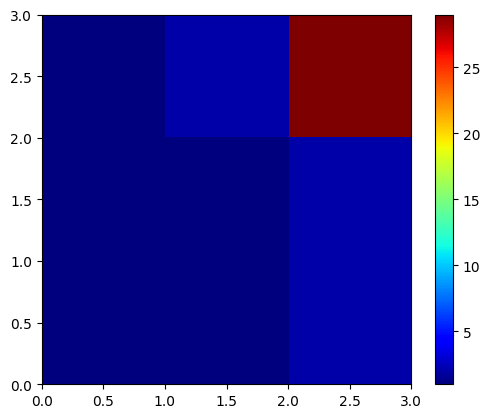

In [32]:
#2 DIMENSIONAL
dx = 1.
nx = 3
dy = 1.
ny = 3

#the velocity field's 'grid' has to be >2x larger than the mesh for the variables
#so dx_vel*nx_vel > dx*nx
dx_vel = 0.5
nx_vel = 7
dy_vel = 0.5
ny_vel = 7

xy = np.zeros((nx_vel, ny_vel, 2))
xy[:, :,  0] = np.mgrid[0:nx_vel, 0:ny_vel][0] * dx_vel
xy[:, :, 1] = np.mgrid[0:nx_vel, 0:ny_vel][1] * dy_vel

u = xy[..., 0] + xy[..., 1]
v = xy[..., 0] * xy[..., 1]

print(xy.shape)
print(u.shape)
print(v.shape)

m = Grid2D(nx=nx, ny=ny, dx=dx, dy=dy)
init=5

xy_interp = np.array(m.faceCenters).swapaxes(0, 1)
u_interp = interpolate.griddata(xy.reshape(-1, 2), u.flatten(), xy_interp, method='cubic')
v_interp = interpolate.griddata(xy.reshape(-1, 2), v.flatten(), xy_interp, method='cubic')

var = CellVariable(mesh=m,value=init)

diffusion = 1.0
velocity = FaceVariable(mesh=m, rank=1)

print(u_interp)
print(v_interp)
velocity[0, :] = u_interp
velocity[1, :] = v_interp


eqn = TransientTerm() + ConvectionTerm(velocity) == DiffusionTerm(diffusion)

eqn.solve(var, dt=1.0)

viewer = Viewer(vars=var)

In [ ]:
#1 DIMENSIONAL

dx = 0.5
nx = 7

dx_vel = 1.0
nx_vel = 3



[0.5 1.5 2.5 1.5 2.5 3.5 2.5 3.5 4.5 3.5 4.5 5.5 0.5 1.5 2.5 3.5 1.5 2.5
 3.5 4.5 2.5 3.5 4.5 5.5]
[0.  0.  0.  0.5 1.5 2.5 1.  3.  5.  1.5 4.5 7.5 0.  0.5 1.  1.5 0.  1.5
 3.  4.5 0.  2.5 5.  7.5]


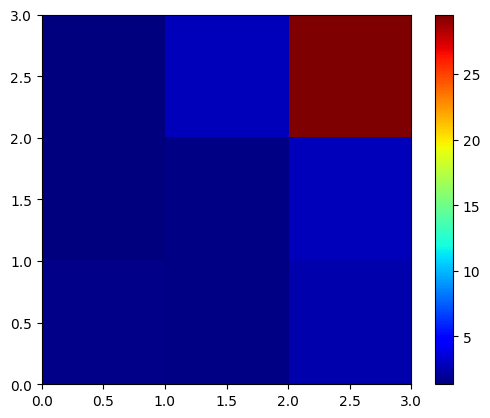

In [ ]:
from fipy import Grid2D, CellVariable, FaceVariable, Viewer
from fipy import ConvectionTerm, DiffusionTerm, TransientTerm

# Define mesh (3×3 grid)
m = Grid2D(nx=3, ny=3, dx=1.0, dy=1.0)

# Initialize variable
var = CellVariable(mesh=m, value=5.0)

# Define velocity directly on FiPy mesh
velocity = FaceVariable(mesh=m, rank=1)
x, y = m.faceCenters
velocity[0] = x + y  # u = x + y
velocity[1] = x * y  # v = x * y

print(velocity[0])
print(velocity[1])

# Define PDE
eqn = TransientTerm() + ConvectionTerm(velocity) == DiffusionTerm(1.0) #so this now solves du/dt + (x+y)du/dx + (x*y)du/dy = del^2 u

# Time-stepping
for step in range(1):
    eqn.solve(var, dt=1)

# Visualize
viewer = Viewer(var)